Statevector([-0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j,  0.35355339+0.j,
              0.35355339+0.j,  0.35355339+0.j],
            dims=(2, 2, 2))
Statevector([ 0.88388348+0.j, -0.1767767 +0.j, -0.1767767 +0.j,
             -0.1767767 +0.j, -0.1767767 +0.j, -0.1767767 +0.j,
             -0.1767767 +0.j, -0.1767767 +0.j],
            dims=(2, 2, 2))
{'000': 941, '110': 9, '100': 10, '010': 6, '111': 9, '011': 9, '101': 6, '001': 10}
000: 941
110: 9
100: 10
010: 6
111: 9
011: 9
101: 6
001: 10


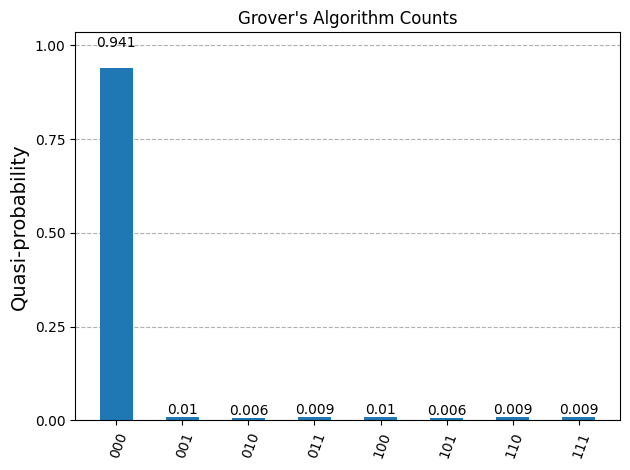

In [11]:
from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector
from qiskit.primitives import StatevectorSampler
from qiskit.visualization import plot_histogram

qc = QuantumCircuit(3)

#All qubits in super position
qc.h(0)  # Apply Hadamard gate to qubit 0
qc.h(1)
qc.h(2)

#Tag the solution with the oracle
qc.x(0)  # Apply X gate to qubit 0
qc.x(1)
qc.x(2)  # Apply X gate to qubit 2
qc.ccz(0,1,2)
qc.x(0)  # Apply X gate to qubit 0 again
qc.x(1)  # Apply X gate to qubit 1
qc.x(2)  # Apply X gate to qubit 2 again
print(Statevector(qc))


#Grover diffusion step/Inversion about the mean
qc.h([0, 1, 2])  # Apply Hadamard gates to all qubits
qc.x([0, 1, 2])  # Apply X gates to all qubits
qc.ccz(0, 1, 2)  # Apply Toffoli gate to all qubits
qc.x([0, 1, 2])  # Apply X gates to all qubits
qc.h([0, 1, 2])  # Apply Hadamard gates to all qubits again


#Tag the solution with the oracle
qc.x(0)  # Apply X gate to qubit 0
qc.x(1)  # Apply X gate to qubit 1
qc.x(2)  # Apply X gate to qubit 2
qc.ccz(0,1,2)
qc.x(0)  # Apply X gate to qubit 0 again
qc.x(1)  # Apply X gate to qubit 1
qc.x(2)  # Apply X gate to qubit 2 again
print(Statevector(qc))


#Grover diffusion step/Inversion about the mean
qc.h([0, 1, 2])  # Apply Hadamard gates to all qubits
qc.x([0, 1, 2])  # Apply X gates to all qubits
qc.ccz(0, 1, 2)  # Apply Toffoli gate to all qubits
qc.x([0, 1, 2])  # Apply X gates to all qubits
qc.h([0, 1, 2])  # Apply Hadamard gates to all qubits again


qc.measure_all()  # Measure all qubits

qc2 = QuantumCircuit(5)

shots = 1000
result = StatevectorSampler().run([qc],shots = shots).result()

counts = result[0].data.meas.get_counts()
print(counts)

for p,c in counts.items():
    print(f"{p}: {c}")
pro_dict = {state:c /shots for state ,c in counts.items()}

plot_histogram({state:c /shots for state ,c in counts.items()}, title="Grover's Algorithm Counts")

#qc.draw("mpl")